## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
# setting the option to allow for full viewing of columns in DFs
pd.set_option("max_columns", None)

In [3]:
df = pd.read_csv("data/airline_sample_10k.csv")

In [4]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-08-17,DL,DL_CODESHARE,DL,3452,9E,N349PQ,3452,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,0,NaN,0,N,88,81.0,60.0,1,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-28,AA,AA_CODESHARE,AA,6002,YV,N933LR,6002,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,0,NaN,0,N,129,126.0,93.0,1,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checking for null values
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  27
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 162
dep_delay                167
taxi_out                 175
wheels_off               175
wheels_on                180
taxi_in                  180
crs_arr_time               0
arr_time                 176
arr_delay                200
cancelled                  0
cancellation_code       9828
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      199
air_time                 203
flights                    0
distance                   0
carrier_delay           8132
weather_delay 

In [7]:
# dropping all cancelled flights since they will skew the model
df = df[df['cancelled'] != 1]

# same reasoning for dropping diverted flights
df = df[df['diverted'] != 1]

In [8]:
# dropping the no_name column comprised of commas since this is a csv
df = df.drop('no_name', axis = 1)

In [9]:
# getting rid of unimportant columns

df = df.drop(axis = 1, labels = ['branded_code_share', 'mkt_carrier_fl_num', 'tail_num', 'op_carrier_fl_num', 'cancelled', 'cancellation_code', 'diverted', 'flights', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime'])

In [10]:
df.head(2)

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-08-17,DL,DL,9E,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,N,88,81.0,60.0,408,NaN,NaN,NaN,NaN,NaN
1,2019-01-28,AA,AA,YV,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,N,129,126.0,93.0,597,NaN,NaN,NaN,NaN,NaN


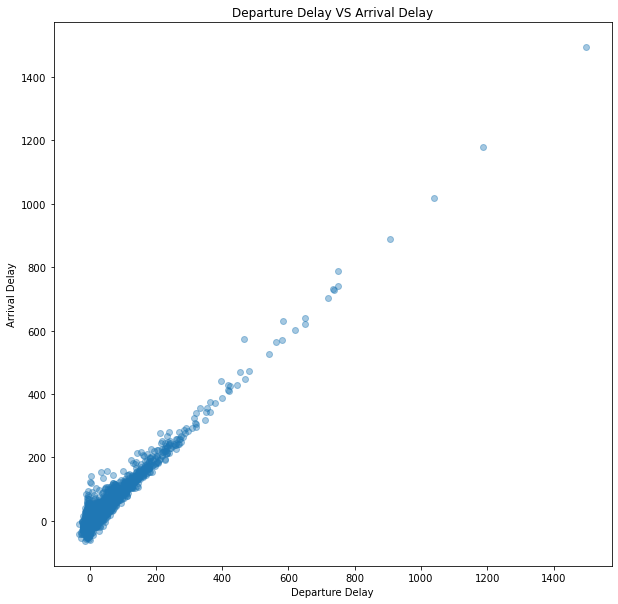

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(df['dep_delay'], df['arr_delay'], alpha = 0.4)
plt.title('Departure Delay VS Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')

plt.show()
# this shows a strong correlation between dep_delay and arr_delay as expected

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [12]:
# checking for and dropping null values in arr_delay
df["arr_delay"].isnull().sum()
df.dropna(subset = ["arr_delay"], inplace = True)

In [13]:
arr_delay_zs = stats.zscore(df["arr_delay"], nan_policy = 'omit')
arr_delay_zs3 = arr_delay_zs < 3

df['arr_delay_zs'] = df['arr_delay'][arr_delay_zs3]

In [14]:
df['arr_delay_zs'].head(2)

0   -12.0
1     2.0
Name: arr_delay_zs, dtype: float64

In [15]:
df["arr_delay_zs"].describe()

count    9647.000000
mean        0.781383
std        28.112275
min       -64.000000
25%       -15.000000
50%        -6.000000
75%         6.000000
max       162.000000
Name: arr_delay_zs, dtype: float64

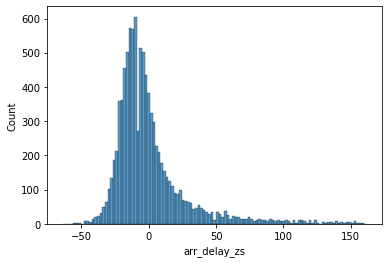

In [16]:
histplot = sns.histplot(data = df["arr_delay_zs"])

In [17]:
delay_arr = df['arr_delay_zs'].fillna(0).to_numpy()

# reshaping the data into an array to pass into Shapiro Test
delay_arr.reshape(-1, 1)

array([[-12.],
       [  2.],
       [ -6.],
       ...,
       [-18.],
       [-21.],
       [ -2.]])

In [18]:
shapiro_test = stats.shapiro(delay_arr)
shapiro_test

ShapiroResult(statistic=0.7740926742553711, pvalue=0.0)

In [19]:
# This was an attempt to remove 0's before log transformation by adding a constant slightly larger than the min value
# in arr_delay

#df["arr_delay"].min()
#df["arr_delay_const"] = df["arr_delay"] + 64.001

In [20]:
# df["arr_delay_log"] = df["arr_delay_zs"].apply(np.log1p).fillna(0)

In [21]:
# df["arr_delay_log"].head()

In [22]:
# Somehow getting Nan values in statistic here

# shapiro_test = stats.shapiro(df['arr_delay_log'])
# shapiro_test

In [23]:
# histplot = sns.histplot(data = df["arr_delay_log"])

In [24]:
df.head(2)

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs
0,2019-08-17,DL,DL,9E,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,N,88,81.0,60.0,408,NaN,NaN,NaN,NaN,NaN,-12.0
1,2019-01-28,AA,AA,YV,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,N,129,126.0,93.0,597,NaN,NaN,NaN,NaN,NaN,2.0


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [25]:
# splitting the date on the hyphen to easily access the month
spl_date = [date.split('-')[1] for date in df['fl_date']]

In [26]:
df['months'] = spl_date
df.head(2)

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs,months
0,2019-08-17,DL,DL,9E,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,N,88,81.0,60.0,408,NaN,NaN,NaN,NaN,NaN,-12.0,08
1,2019-01-28,AA,AA,YV,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,N,129,126.0,93.0,597,NaN,NaN,NaN,NaN,NaN,2.0,01


In [27]:
# Reordering the DF by saving the columns and then adding them after the months column

cols = list(df.columns)
cols.pop(cols.index('fl_date'))
cols.pop(cols.index('months'))
df = df[['fl_date','months'] + cols]
df.head(2)

,fl_date,months,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs
0,2019-08-17,08,DL,DL,9E,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,N,88,81.0,60.0,408,NaN,NaN,NaN,NaN,NaN,-12.0
1,2019-01-28,01,AA,AA,YV,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,N,129,126.0,93.0,597,NaN,NaN,NaN,NaN,NaN,2.0


In [28]:
# Changing months dtype to int so that we can perform numerical operations on the values
df['months'] = df['months'].astype(int)

In [29]:
df.groupby(by = 'months').mean()[['arr_delay']]

,arr_delay
months,
1,4.556291
2,5.853916
3,3.261682
4,4.428212
5,4.883162
6,10.671429
7,9.182333
8,9.321143
9,3.279040


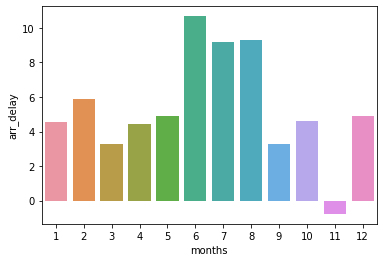

In [30]:
month_vs_delay = sns.barplot(x = df['months'], y = df['arr_delay'], ci = None)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [31]:
# getting zscore for taxi times to use for outlier omission
taxi_zs = stats.zscore(df["taxi_out"], nan_policy = 'omit')

In [32]:
# assigning a variable to booleans where taxi_zs is less than 3
taxi_zs_3 = taxi_zs < 3

In [33]:
df['taxi_out_zs'] = df['taxi_out'][taxi_zs_3]
df.shape

(9800, 33)

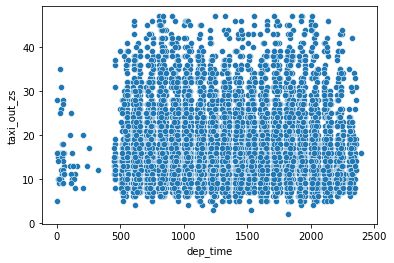

In [34]:
taxi_graph = sns.scatterplot(x = df['dep_time'], y = df['taxi_out_zs'])

#consider binning times here
#consider 2d distribution maps

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [35]:
# assuming that the question here is asking for proportion of delays caused by depratrue delays

df.head()
# we want to see proportion of dep_delay > 0 resulting in arr_delay > 0
df_delarr = df.loc[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]
df_delarr = df_delarr[['dep_delay', 'arr_delay']]
len(df_delarr),len(df.loc[df['arr_delay'] > 0])

(2430, 3398)

In [36]:
# avg percentage of delays  = (2277/3245) * 100


#### **Task 6**: How many states cover 50% of US air traffic? 

In [37]:
df.head(2)

,fl_date,months,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs,taxi_out_zs
0,2019-08-17,8,DL,DL,9E,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,N,88,81.0,60.0,408,NaN,NaN,NaN,NaN,NaN,-12.0,18.0
1,2019-01-28,1,AA,AA,YV,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,N,129,126.0,93.0,597,NaN,NaN,NaN,NaN,NaN,2.0,19.0


In [38]:
#ploot = sns.scatterplot(x = df["dep_delay"], y = )

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [39]:
#df["dep_delay"] = df["dep_delay"][(np.abs(stats.zscore(df["dep_delay"])) < 3)]

df['speed'] = df['distance'] / df['air_time']

#ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
#print(float(pval))
#if pval<0.05:
#    print("reject null hypothesis")
#else:
#    print("accept null hypothesis")

In [40]:
#df_w_delay = df.loc[(df['dep_delay'] > 0)]
#df_w_delay = df_w_delay[['dep_delay', 'speed']]

#df_no_delay = df.loc[(df['dep_delay'] <= 0)]
#df_no_delay = df_no_delay[['dep_delay', 'speed']]

In [41]:
#fig, ax = plt.subplots(figsize=(8, 8))

# add the plots for each dataframe
#sns.regplot(y='dep_delay', x='speed', data=df_w_delay, fit_reg=True, ci=None, ax=ax, label='Speed with delay')
#sns.regplot(y='dep_delay', x='speed', data=df_no_delay, fit_reg=True, ci=None, ax=ax, label='Speed without delay')
#ax.set(xlabel='Speed', ylabel='Departure Delay')
#ax.legend()
#plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

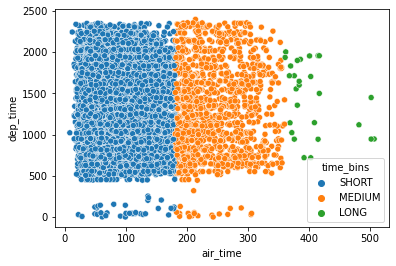

In [42]:
# we want to bin the data based on air_time feature
# i will take 0-3 hours to be SHORT, 3-6 hours to be MEDIUM and 6+ hours to be long

bins = [0, 180, 360, np.inf]
labels = ['SHORT', 'MEDIUM', 'LONG']
df['time_bins'] = pd.cut(df['air_time'], bins=bins, labels=labels)
#df.head()
#df['time_bins']
plot = sns.scatterplot(data = df, x = 'air_time', y = 'dep_time', hue = df['time_bins'], ci = None)

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [43]:
df['mkt_unique_carrier'].nunique()

11

In [44]:
df.head(2)

,fl_date,months,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_zs,taxi_out_zs,speed,time_bins
0,2019-08-17,8,DL,DL,9E,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,N,88,81.0,60.0,408,NaN,NaN,NaN,NaN,NaN,-12.0,18.0,6.800000,SHORT
1,2019-01-28,1,AA,AA,YV,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,N,129,126.0,93.0,597,NaN,NaN,NaN,NaN,NaN,2.0,19.0,6.419355,SHORT


In [45]:
df['total_delay'] = (df['carrier_delay'] + df['weather_delay']
             + df['nas_delay'] + df['security_delay'] + df['late_aircraft_delay'])

df_delays = df.loc[(df['total_delay'] != np.NaN)]
df['total_delay'].fillna(0, inplace=True)
df['total_delay'].head()

0     0.0
1     0.0
2     0.0
3    81.0
4    16.0
Name: total_delay, dtype: float64

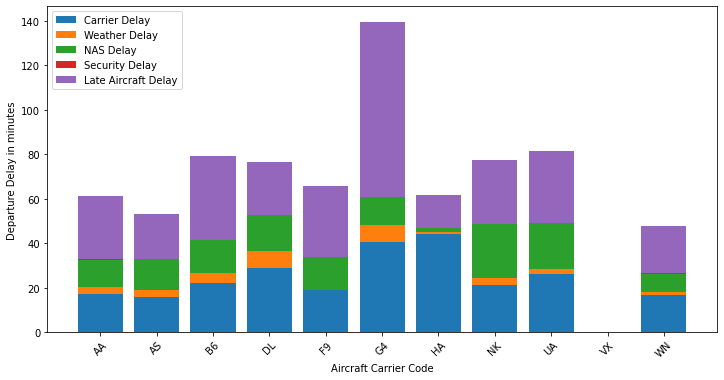

In [46]:
carrier_group = df_delays['carrier_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
weather_group = df_delays['weather_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
nas_group = df_delays['nas_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
security_group = df_delays['security_delay'].groupby(df_delays['mkt_unique_carrier']).mean()
late_group = df_delays['late_aircraft_delay'].groupby(df_delays['mkt_unique_carrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

In [47]:
df_delays = df_delays[df_delays['total_delay'] > 0]

In [48]:
carrier_flights = df['mkt_unique_carrier'].groupby(df['mkt_unique_carrier']).count()
carrier_delays = df_delays['total_delay'].groupby(df_delays['mkt_unique_carrier']).count()
carrier_avg_time = df['air_time'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_dist = df['distance'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_delay = df['total_delay'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_taxiIn = df['taxi_in'].groupby(df['mkt_unique_carrier']).mean()
carrier_avg_taxiOut = df['taxi_out'].groupby(df['mkt_unique_carrier']).mean()

In [49]:
summary_table_carrier = pd.concat([carrier_flights, carrier_delays, carrier_avg_time, carrier_avg_dist,
                                   carrier_avg_delay, carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = ['Total Flights', 'Total Delays', 'Avg Flight Time (mins)',
                         'Avg Flight Distance', 'Avg Flight Delay (mins)', 
                         'Avg Taxi-In (mins)', 'Avg Taxi-Out (mins)']

summary_table_carrier

,Total Flights,Total Delays,Avg Flight Time (mins),Avg Flight Distance,Avg Flight Delay (mins),Avg Taxi-In (mins),Avg Taxi-Out (mins)
mkt_unique_carrier,,,,,,,
AA,2525,515.0,100.752475,700.957228,12.518020,9.058218,18.782178
AS,545,92.0,132.097248,960.801835,9.014679,7.370642,17.484404
B6,371,106.0,144.676550,1070.164420,22.690027,6.865229,18.110512
DL,2192,336.0,98.822993,693.317974,11.727646,7.280566,18.449818
F9,144,37.0,135.236111,1021.708333,16.965278,11.576389,17.111111
G4,126,24.0,117.023810,871.214286,26.587302,6.722222,12.920635
HA,126,13.0,78.655738,564.888889,6.388889,6.590164,11.737705
NK,224,47.0,137.709821,1013.875000,16.245536,10.482143,16.120536
UA,1914,413.0,108.470219,774.241379,17.555904,8.208986,20.416405


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=50, random_state=47).fit(X_train, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))